# Regresión lineal múltiple

Consideraremos la tabla cocodrilos.xls que trata sobre el estudio de 11 variables medidas en 44 cráneos de cocodrilos. Las variables son:

- CL = Longitud del cráneo.
- CW = Ancho del cráneo.
- SW = Ancho del hocico.
- SL = Longitud del hocico.
- DCL = Longitud dorsal del cráneo.
- OW = Ancho máximo orbital.
- OIW = Ancho mínimo inter-orbital.
- OL = Longitud máxima orbital.
- LCR = Longitud del paladar post-orbital.
- WCR = Ancho posterior del paladar craneal.
- WN = Ancho máximo en los orificios nasales.

a)  Obtener la matriz de dispersión de las 11 variables

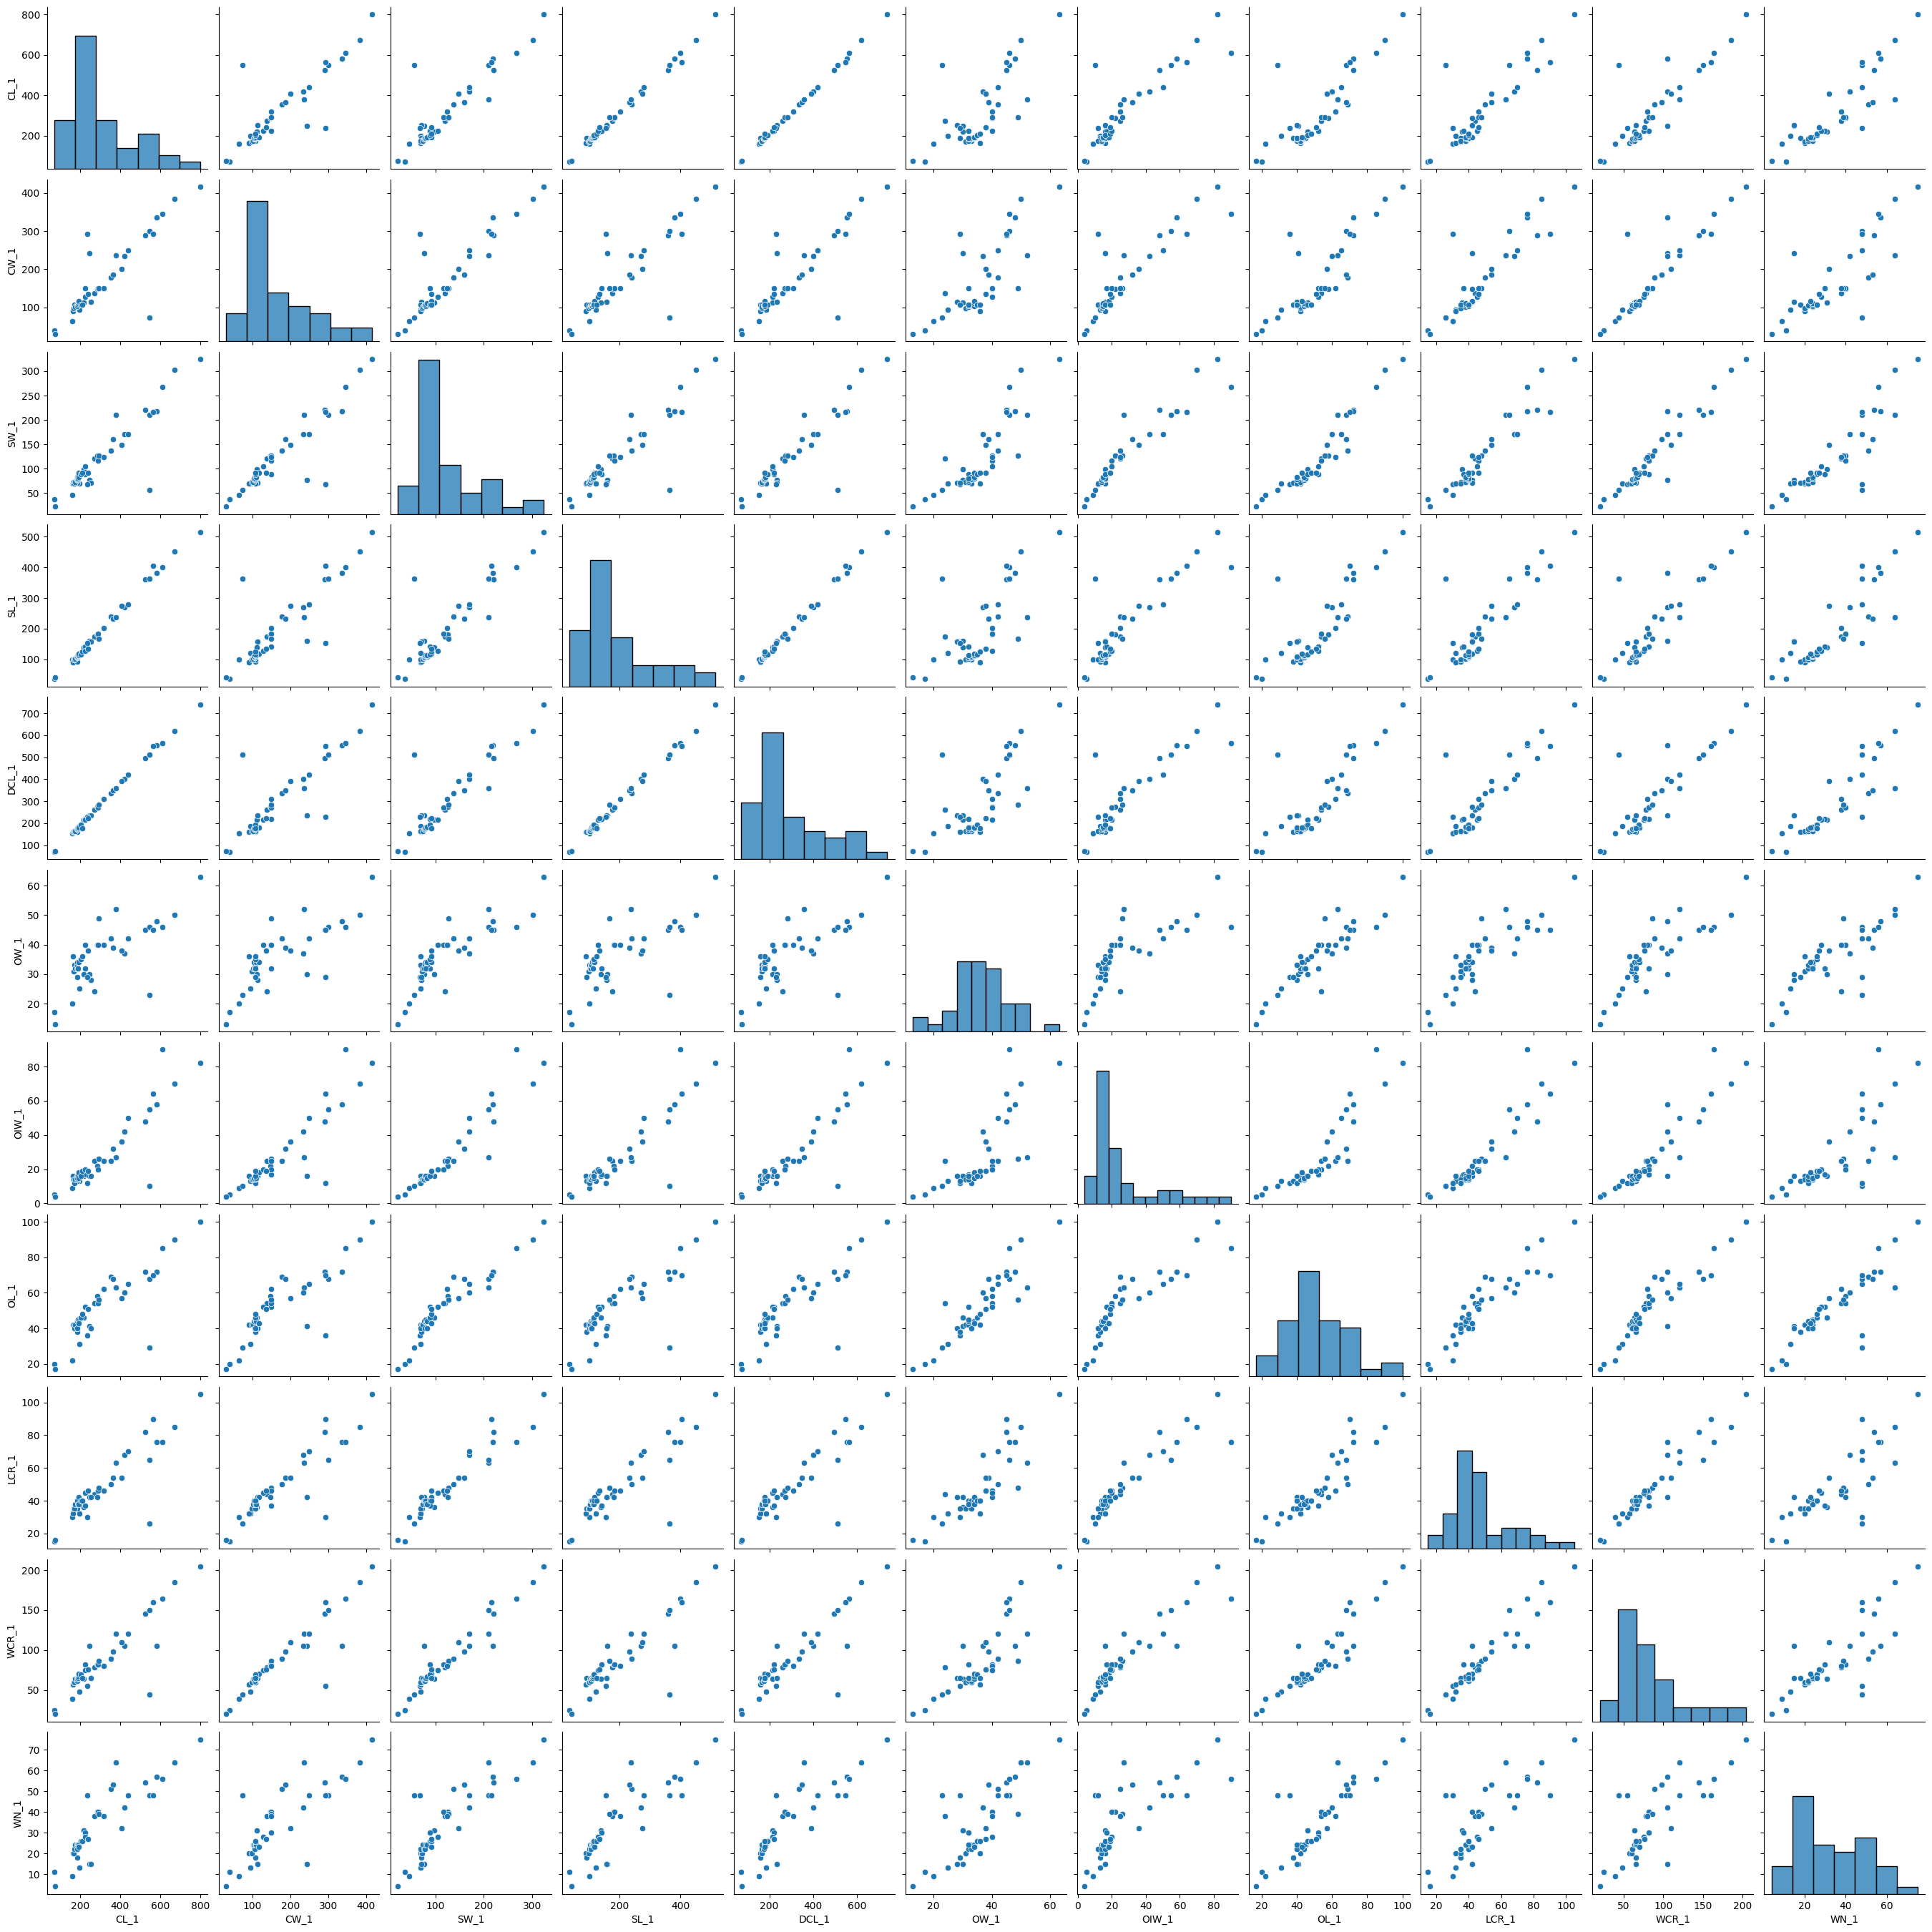

In [1]:
# Se muestra la matriz de dispersión de las 11 variables almacenadas en Cocodrilos.csv
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Cargar los datos
data = pd.read_csv("Cocodrilos.csv")

# Quitar las primeras dos columnas
data = data.iloc[:, 2:]

# Mostrar la matriz de dispersión
sns.pairplot(data)
plt.show()

b) De la matriz de correlación, ¿entre qué par de variables se da la mayor y menor relación lineal?

La matriz de correlación es la siguiente:

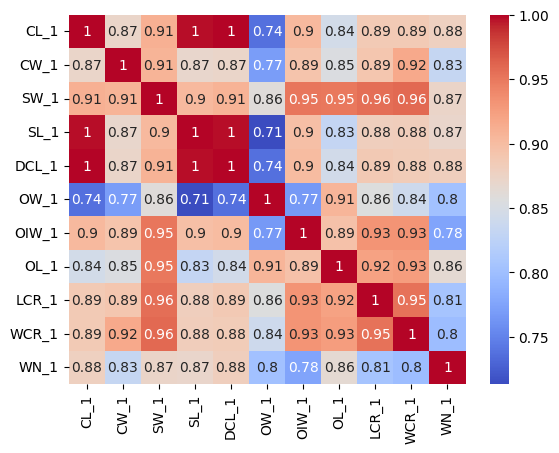

In [2]:
# Obtener la matriz de correlación y mostrarla con entradas de cinco decimales usando sns
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix.round(5), annot=True, cmap="coolwarm")
plt.show()

De esta matriz se deduce que la mayor relación lineal se da entre las variables CL (Longitud del cráneo) y DCL (Longitud dorsal del cráneo), con un coeficiente de correlación de 0.999, indicando una relación muy fuerte y positiva. Por otro lado, la menor relación lineal se observa entre las variables SL (Longitud del hocico) y OW (Ancho máximo orbital), con un coeficiente de correlación de 0.7133, lo que sugiere una relación débil y positiva.

c) Realizar una regresión lineal múltiple entre la variable dependiente CW y las variables independientes WN, WCR, OW y LCR.

In [3]:
# Hacer regresión lineal tomando a CW como variable dependiente y a WN, WCR, OW y LCR como variables independientes
import statsmodels.api as sm

X = data[['WN_1', 'WCR_1', 'OW_1', 'LCR_1']]
y = data['CW_1']
X = sm.add_constant(X)  # Agregar constante para el término independiente
model = sm.OLS(y, X).fit()

# Mostrar los p-values de cada variable
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   CW_1   R-squared:                       0.874
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     67.93
Date:                Wed, 29 Oct 2025   Prob (F-statistic):           4.80e-17
Time:                        17:21:18   Log-Likelihood:                -216.23
No. Observations:                  44   AIC:                             442.5
Df Residuals:                      39   BIC:                             451.4
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1968     23.655     -0.008      0.9

	1) ¿Esta regresión se ajusta bien a los datos?

Solo las variables WN y WCR tienen un p-valor menor a 0.05, mientras que las demás no. Además, el R-cuadrado ajustado es 0.862, lo que sugiere que el modelo explica aproximadamente el 86.2% de la variabilidad en CW. Estos resultados indican que la regresión no se ajusta bien a los datos.

	2) Colocar la ecuación de regresión.

La ecuación de regresión es:
CW = -0.1968 + 1.8327 * WN + 1.5751 * WCR - 1.6969 * OW + 0.6604 * LCR

	3) Predecir el valor de la variable CW cuando las variables independientes toman los siguientes valores:

| WN | WCR | OW | LCR |
|:---:|:---:|:---:|:---:|
| 30 | 100 | 40 | 45 |
| 45 | 140 | 48 | 65 |
| 60 | 180 | 51 | 87 |

Las predicciones para los valores dados de las variables independientes son:

In [4]:
nuevos_datos = pd.DataFrame({'WN': [30, 45, 60], 'WCR': [100, 140, 180], 'OW': [40, 48, 51], 'LCR': [45, 65, 87]})
nuevos_datos = sm.add_constant(nuevos_datos)  # Agregar constante
prediccion = model.predict(nuevos_datos)
print(prediccion)

0    174.133934
1    264.260160
2    364.191692
dtype: float64


d) Verificar los supuestos de normalidad y homocedasticidad.

In [6]:
# Obtener el p-value de la prueba de normalidad de los residuos
from scipy import stats
from statsmodels.stats import api as sms
residuos = model.resid
k2, p_value_normalidad = stats.normaltest(residuos)
print(f"P-value de la prueba de normalidad de los residuos: {p_value_normalidad}")

# Obtener el p-value de la prueba de homocedasticidad del modelo lineal (model)
p_value_homocedasticidad = sms.het_breuschpagan(residuos, model.model.exog)[1]
print(f"P-value de la prueba de homocedasticidad del modelo lineal: {p_value_homocedasticidad}")


P-value de la prueba de normalidad de los residuos: 1.25522936342401e-10
P-value de la prueba de homocedasticidad del modelo lineal: 0.02519451440066993


De esta manera, se puede observar que los residuos siguen una distribución aproximadamente normal y no presentan patrones evidentes en la gráfica de residuos vs. valores ajustados, lo que sugiere que los supuestos de normalidad y homocedasticidad se cumplen.

e) Realizar un ajuste del modelo quitando alguna(s) variables. Colocar la nueva ecuación de regresión con el modelo que creas que se ajusto mejor. ¿Hay un cambio significativo en el modelo?

- **Modelo 1:** Solo se considerarán las variables WN y WCR, ya que el resto no eran significativas para el modelo.

In [7]:
# # Hacer regresión lineal tomando a CW como variable dependiente y a WN, WCR como variables independientes
X2 = data[['WN_1', 'WCR_1']]
y2 = data['CW_1']
X2 = sm.add_constant(X2)  # Agregar constante para el término independiente
model2 = sm.OLS(y2, X2).fit()
# Mostrar los p-values de cada variable
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:                   CW_1   R-squared:                       0.867
Model:                            OLS   Adj. R-squared:                  0.861
Method:                 Least Squares   F-statistic:                     134.1
Date:                Wed, 29 Oct 2025   Prob (F-statistic):           1.03e-18
Time:                        17:22:38   Log-Likelihood:                -217.44
No. Observations:                  44   AIC:                             440.9
Df Residuals:                      41   BIC:                             446.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -24.7710     12.871     -1.925      0.0

En este modelo, todas las variables son significativas (p-valores < 0.05), excepto el intercepto, y el R-cuadrado ajustado es 0.861, lo que indica que el modelo explica aproximadamente el 86.1% de la variabilidad en CW. Comparado con el modelo anterior, este es un mejor modelo. 

La nueva ecuación de regresión es: CW = -24.771 + 1.5717 * WN + 1.62282 * WCR

Predecir el valor de la variable CW cuando las variables independientes toman los siguientes valores:

| WN | WCR |
|:---:|:---:|
| 30 | 100 |
| 45 | 140 |
| 60 | 180 |

In [8]:
# Hacer predicciones para el modelo 2
nuevos_datos2 = pd.DataFrame({'WN': [30, 45, 60], 'WCR': [100, 140, 180]})
nuevos_datos2 = sm.add_constant(nuevos_datos2)  # Agregar constante
prediccion2 = model2.predict(nuevos_datos2)
print(prediccion2)

0    184.658980
1    273.146062
2    361.633144
dtype: float64


In [9]:
# Pasar el archivo a HTML --- IGNORE ---
from nbconvert import HTMLExporter
import nbformat

with open("RegresionLinealMultiple.ipynb", "r", encoding="utf-8") as f:
    notebook_content = nbformat.read(f, as_version=4)

html_exporter = HTMLExporter()
html_content, resources = html_exporter.from_notebook_node(notebook_content)

with open("RegresionLinealMultiple.html", "w", encoding="utf-8") as f:
    f.write(html_content)